# Param Modes

## Contents

- [Imports](#imports)
- [Loading](#loading-data)
- [Data Preprocessing](#data-preprocessing)
- [Plotting](#plotting)

## Imports

In [1]:
import sys
sys.path.append('../../')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from investigation_functions import ml_visualisation_funcs as mvf

## Loading Data

In [2]:
df_svm_4q = pd.read_csv('../../../ML_results/SVM/svm_4q.csv')
df_svm_8q = pd.read_csv('../../../ML_results/SVM/svm_8q.csv')
df_svm_16q_c111 = pd.read_csv('../../../ML_results/SVM/svm_16q_HSR_c111.csv')

df_knn_4q=pd.read_csv('../../../ML_results/KNN/knn_4q_v2.csv')
df_knn_8q=pd.read_csv('../../../ML_results/KNN/knn_8q_v2.csv')
df_knn_16q_c111 = pd.read_csv('../../../ML_results/KNN/knn_16q_HSR_c111.csv')

## Data Preprocessing

In [3]:
df_svm_4q = df_svm_4q[df_svm_4q['machines'] == 1111]
df_svm_8q = df_svm_8q[df_svm_8q['machines'] == 1111]

df_knn_4q = df_knn_4q[df_knn_4q['machines'] == 1111]
df_knn_8q = df_knn_8q[df_knn_8q['machines'] == 1111]

df_svm_4q_hsr = mvf.get_df_with_same('tr&v circuits','test circuits',df_svm_4q,False)
df_svm_8q_hsr = mvf.get_df_with_same('tr&v circuits','test circuits',df_svm_8q,False)

df_knn_4q_hsr = mvf.get_df_with_same('tr&v circuits','test circuits',df_knn_4q,False)
df_knn_8q_hsr = mvf.get_df_with_same('tr&v circuits','test circuits',df_knn_8q,False)

df_svm_4q_hsr = mvf.get_df_with_same('tr&v exp_type','test exp_type',df_svm_4q,False)
df_svm_8q_hsr = mvf.get_df_with_same('tr&v exp_type','test exp_type',df_svm_8q,False)
df_svm_16q_hsr = mvf.get_df_with_same('tr&v exp_type','test exp_type',df_svm_16q_c111,False)

df_knn_4q_hsr = mvf.get_df_with_same('tr&v exp_type','test exp_type',df_knn_4q,False)
df_knn_8q_hsr = mvf.get_df_with_same('tr&v exp_type','test exp_type',df_knn_8q,False)
df_knn_16q_hsr = mvf.get_df_with_same('tr&v exp_type','test exp_type',df_knn_16q_c111,False)

df_svm_4q_hsr_c111 = df_svm_4q_hsr[df_svm_4q_hsr['tr&v circuits'] == 111]
df_svm_8q_hsr_c111 = df_svm_8q_hsr[df_svm_8q_hsr['tr&v circuits'] == 111]

df_knn_4q_hsr_c111 = df_knn_4q_hsr[df_knn_4q_hsr['tr&v circuits'] == 111]
df_knn_8q_hsr_c111 = df_knn_8q_hsr[df_knn_8q_hsr['tr&v circuits'] == 111]

df_knn_4q_HSR = pd.concat([df_knn_4q_hsr_c111[df_knn_4q_hsr_c111['tr&v exp_type'] == 'Hardware'],df_knn_4q_hsr_c111[df_knn_4q_hsr_c111['tr&v exp_type'] == 'Simulation'], df_knn_4q_hsr_c111[df_knn_4q_hsr_c111['tr&v exp_type'] == 'Refreshed_Simulation']], ignore_index=True)
df_knn_8q_HSR = pd.concat([df_knn_8q_hsr_c111[df_knn_8q_hsr_c111['tr&v exp_type'] == 'Hardware'],df_knn_8q_hsr_c111[df_knn_8q_hsr_c111['tr&v exp_type'] == 'Simulation'], df_knn_8q_hsr_c111[df_knn_8q_hsr_c111['tr&v exp_type'] == 'Refreshed_Simulation']], ignore_index=True)
df_knn_16q_HSR = pd.concat([df_knn_16q_hsr[df_knn_16q_hsr['tr&v exp_type'] == 'Hardware'],df_knn_16q_hsr[df_knn_16q_hsr['tr&v exp_type'] == 'Simulation'], df_knn_16q_hsr[df_knn_16q_hsr['tr&v exp_type'] == 'Refreshed_Simulation']], ignore_index=True)

df_svm_4q_HSR = pd.concat([df_svm_4q_hsr_c111[df_svm_4q_hsr_c111['tr&v exp_type'] == 'Hardware'],df_svm_4q_hsr_c111[df_svm_4q_hsr_c111['tr&v exp_type'] == 'Simulation'], df_svm_4q_hsr_c111[df_svm_4q_hsr_c111['tr&v exp_type'] == 'Refreshed_Simulation']], ignore_index=True)
df_svm_8q_HSR = pd.concat([df_svm_8q_hsr_c111[df_svm_8q_hsr_c111['tr&v exp_type'] == 'Hardware'],df_svm_8q_hsr_c111[df_svm_8q_hsr_c111['tr&v exp_type'] == 'Simulation'], df_svm_8q_hsr_c111[df_svm_8q_hsr_c111['tr&v exp_type'] == 'Refreshed_Simulation']], ignore_index=True)
df_svm_16q_HSR = pd.concat([df_svm_16q_hsr[df_svm_16q_hsr['tr&v exp_type'] == 'Hardware'],df_svm_16q_hsr[df_svm_16q_hsr['tr&v exp_type'] == 'Simulation'], df_svm_16q_hsr[df_svm_16q_hsr['tr&v exp_type'] == 'Refreshed_Simulation']], ignore_index=True)

In [4]:
df_knn_full = pd.concat([df_knn_4q_HSR,df_knn_8q_HSR,df_knn_16q_HSR], ignore_index=True)
df_svm_full = pd.concat([df_svm_4q_HSR,df_svm_8q_HSR,df_svm_16q_HSR], ignore_index=True)

In [5]:
df_knn_4q_HSR['accuracy'] = df_knn_4q_HSR['accuracy'] *100


In [6]:
df_knn_8q_HSR['accuracy'] = df_knn_8q_HSR['accuracy'] *100
df_knn_16q_HSR['accuracy'] = df_knn_16q_HSR['accuracy'] *100

## Plotting 

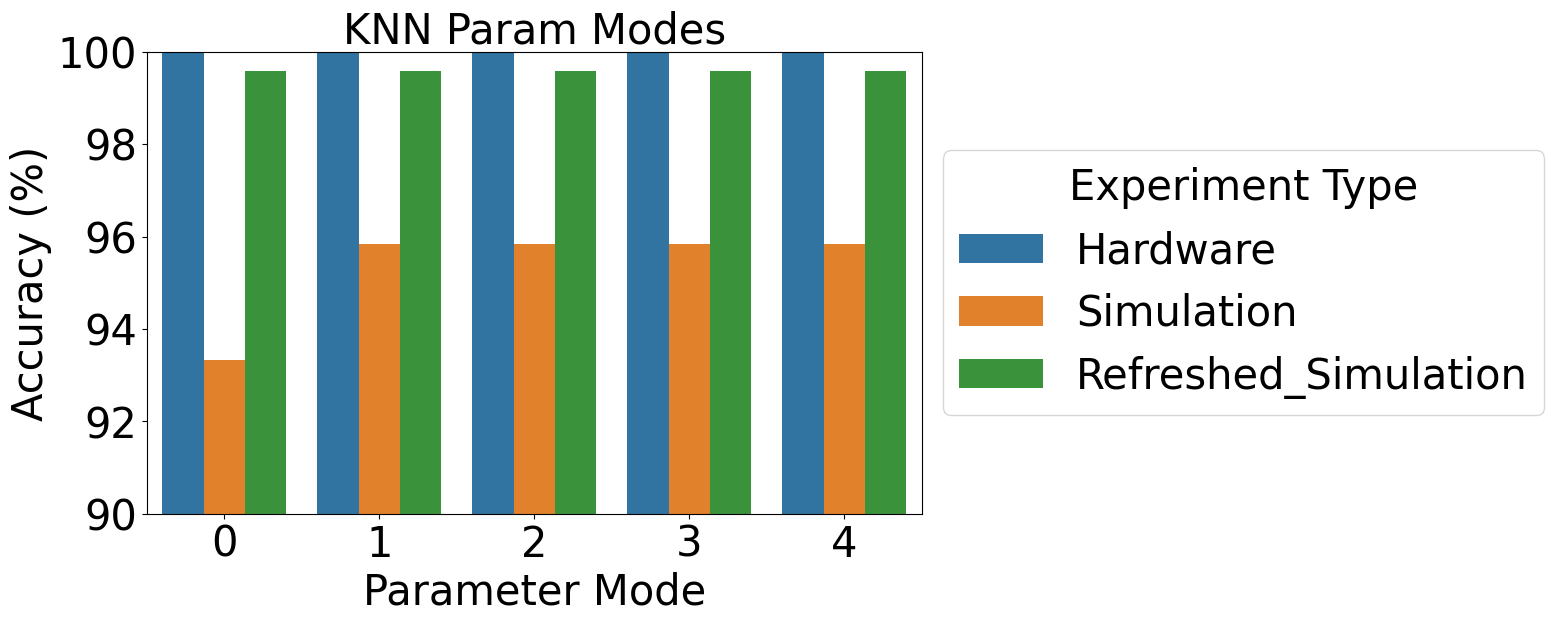

In [7]:
fontsize_ = 30

plt.figure(figsize=(10,6))
sns.barplot(
    data = df_knn_4q_HSR,
    x = 'param settings',
    y = 'accuracy',
    hue= 'tr&v exp_type'    
)
plt.ylim(tuple([90,100]))
plt.title('KNN Param Modes', fontsize = fontsize_)
plt.xlabel('Parameter Mode', fontsize = fontsize_)
plt.xticks(fontsize = fontsize_)
plt.yticks(fontsize = fontsize_)
plt.ylabel('Accuracy (%)', fontsize = fontsize_)
plt.legend(title='Experiment Type',loc='center left', bbox_to_anchor=(1, 0.5), fontsize = fontsize_, title_fontsize = fontsize_)
plt.show()

In [8]:
df_svm_4q_HSR['accuracy'] = df_svm_4q_HSR['accuracy'] *100
df_svm_8q_HSR['accuracy'] = df_svm_8q_HSR['accuracy'] *100
df_svm_16q_HSR['accuracy'] = df_svm_16q_HSR['accuracy'] *100


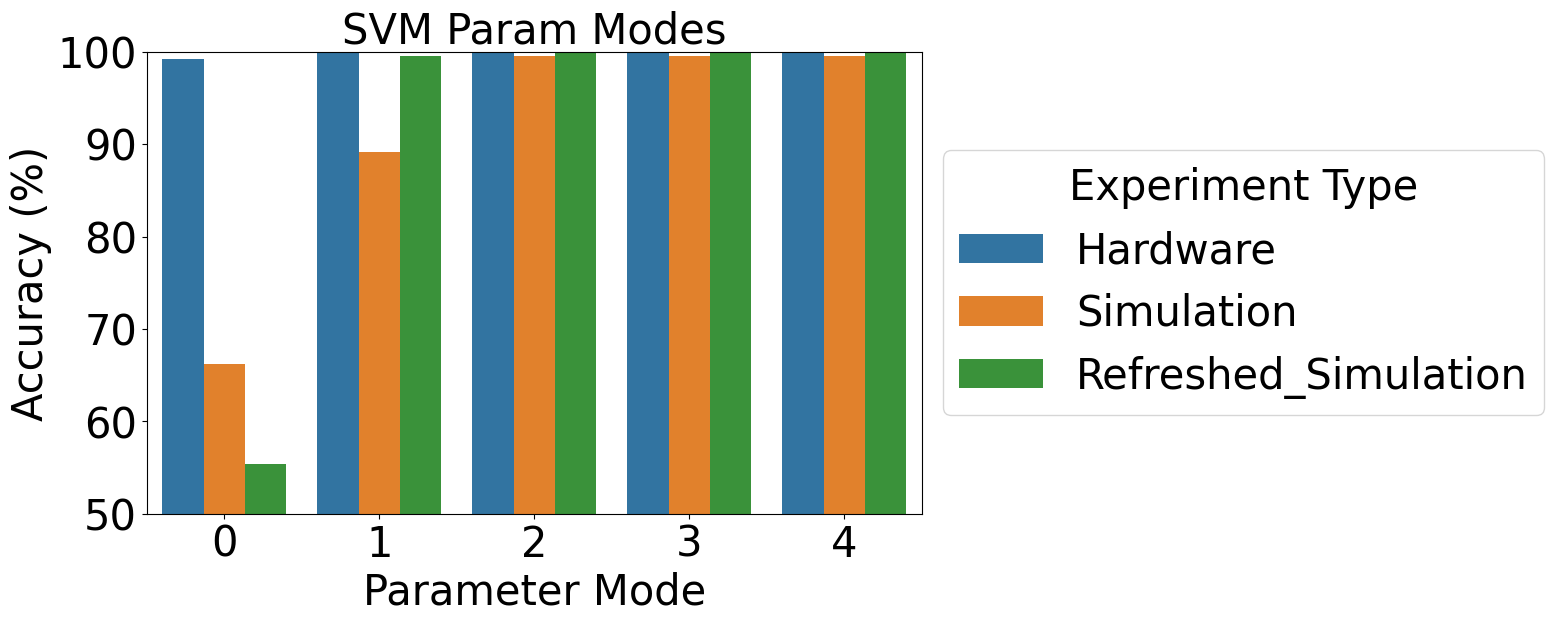

In [9]:
fontsize_ = 30

plt.figure(figsize=(10,6))
sns.barplot(
    data = df_svm_4q_HSR,
    x = 'param settings',
    y = 'accuracy',
    hue= 'tr&v exp_type'    
)
plt.ylim(tuple([50,100]))
plt.title('SVM Param Modes', fontsize = fontsize_)
plt.xlabel('Parameter Mode', fontsize = fontsize_)
plt.xticks(fontsize = fontsize_)
plt.yticks(fontsize = fontsize_)
plt.ylabel('Accuracy (%)', fontsize = fontsize_)
plt.legend(title='Experiment Type',loc='center left', bbox_to_anchor=(1, 0.5), fontsize = fontsize_, title_fontsize = fontsize_)
plt.show()